In [21]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [22]:
X, y = make_blobs(n_samples=2000, centers=4, cluster_std=0.60, random_state=0)
optics = OPTICS(min_samples=50, xi=.05)
optics.fit(X)
labels = optics.labels_ 

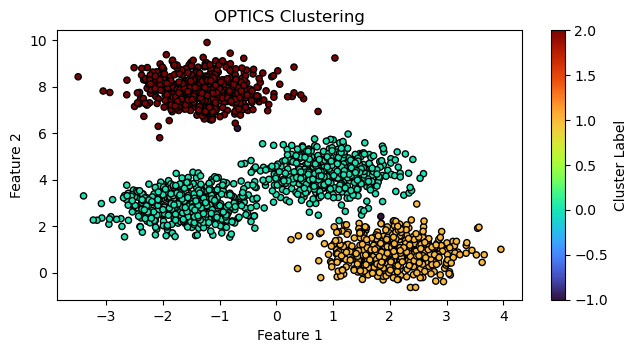

In [23]:
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='turbo', marker='o', edgecolor='k', s=20)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show() 

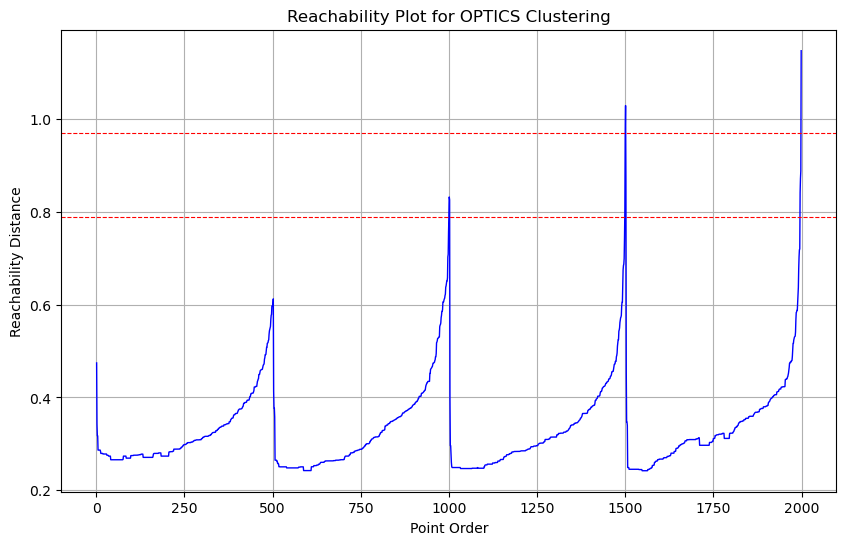

In [24]:
reachability = optics.reachability_
ordering = optics.ordering_
plt.figure(figsize=(10, 6))
plt.plot(range(len(reachability)), reachability[ordering], color='b', linewidth=1)
plt.title('Reachability Plot for OPTICS Clustering')
plt.xlabel('Point Order')
plt.ylabel('Reachability Distance')
plt.grid(True)
for cluster in set(optics.labels_):
    if cluster != -1:  
        plt.axhline(y=optics.reachability_[optics.ordering_][optics.labels_ == cluster].max(), 
                    color='r', linestyle='--', linewidth=0.8)

plt.show()
